### IMPORTING NECESSARY LIBRARIES.

In [65]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

IMPORTING DATASET

In [3]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition[1].csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### INSPECTING DATASET

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.duplicated().sum()

0

In [15]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

Dataset has zero null values and zero duplicated values.

In [25]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']}

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
data = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace = True)

In [16]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


Droping unwandted columns after carefull observation

In employee count all columns filled with '1' so it is unnecessary.

Employee no. is unique no provided by the company to all its employees so not needed.

Over18 - As per labour law only over 18 age people can take into services it is nothing showing any valuable data.

Standard hours - standard hours for all is 80 hours there is no partiallity here so it is also un necessary deleted it.

Separating Object data type and Integer datatype columns

In [17]:
Obj_dtype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        Obj_dtype.append(x)
Obj_dtype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [18]:
Integer_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
        Integer_datatype.append(x)
Integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### EDA

UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

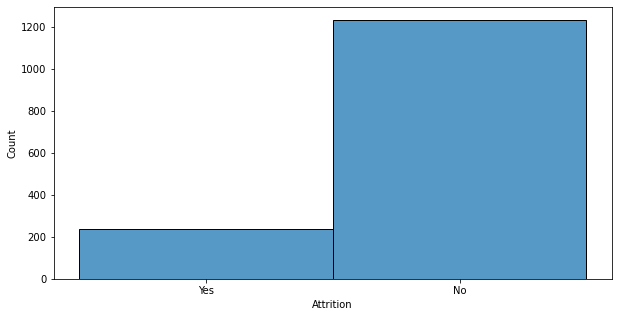

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['Attrition'], bins=30)

Attrition is very less in the company according to the HR.

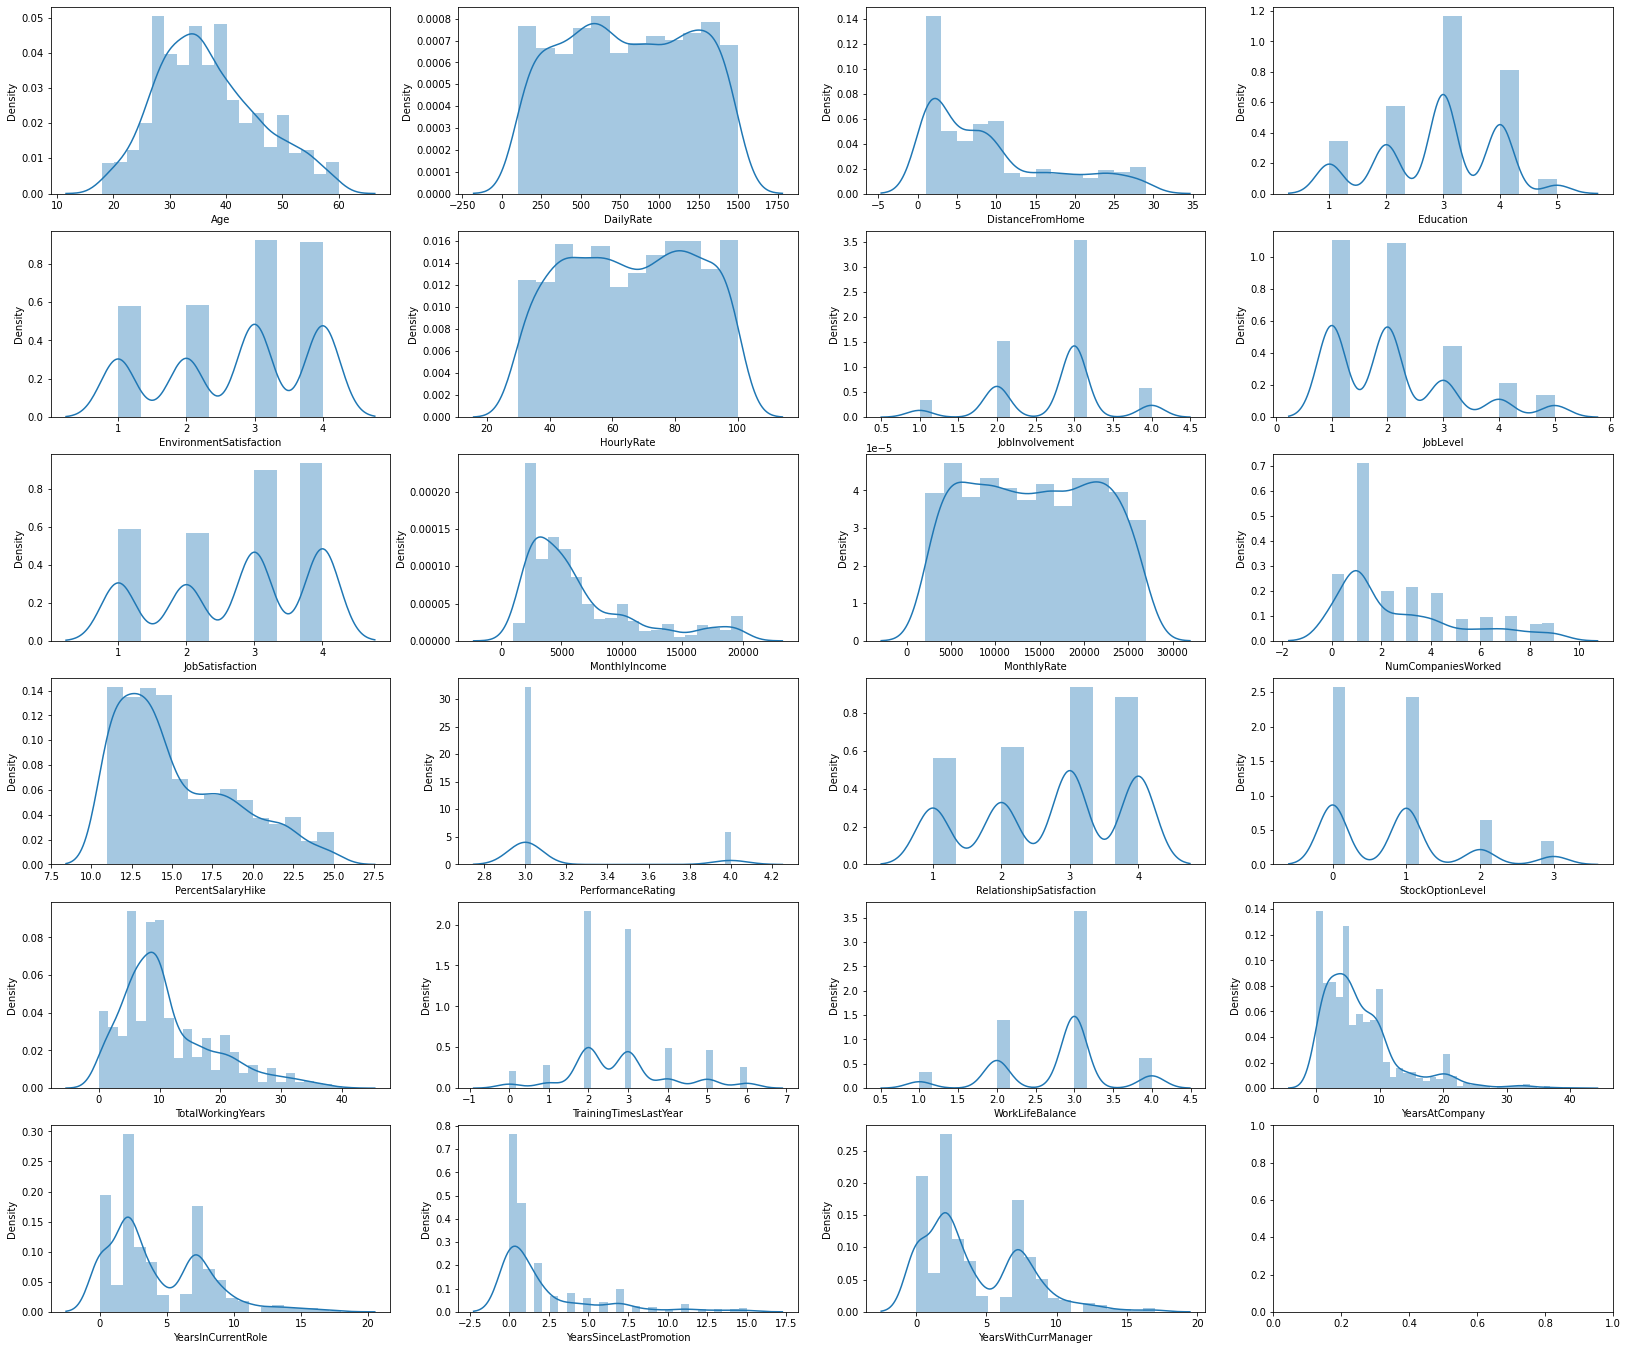

In [26]:
#plotting a histogram of each independent feature for visualization
cols = df.drop(["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"],axis=1).columns
fig,ax = plt.subplots(6,4, figsize=(28, 24))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i])
    i += 1
plt.show()

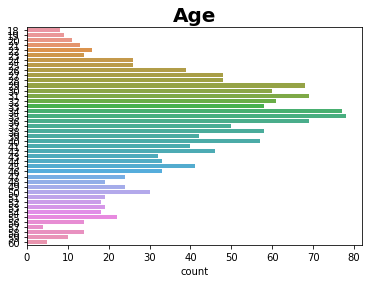

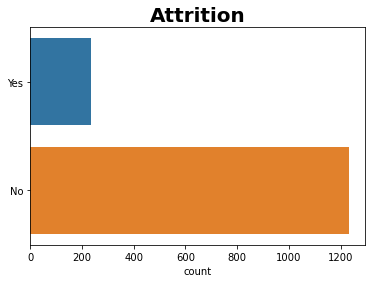

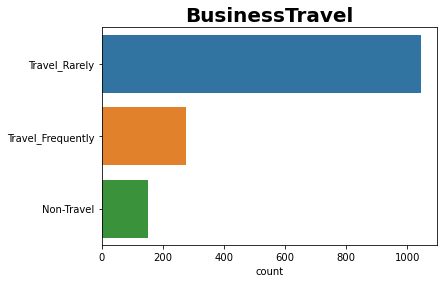

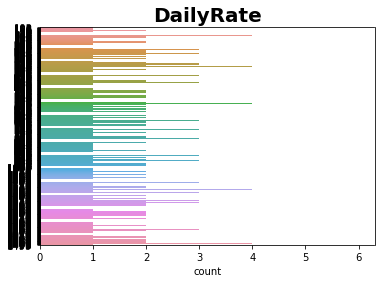

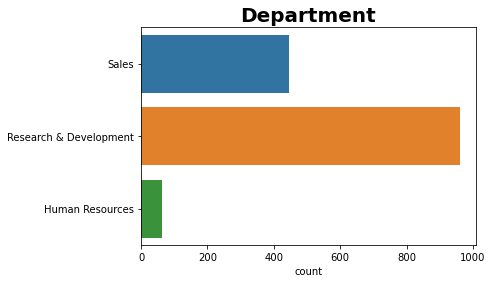

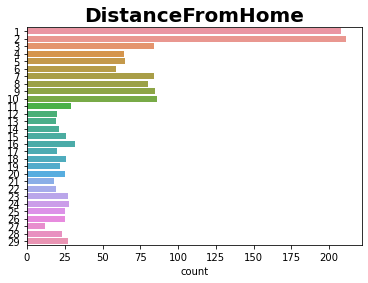

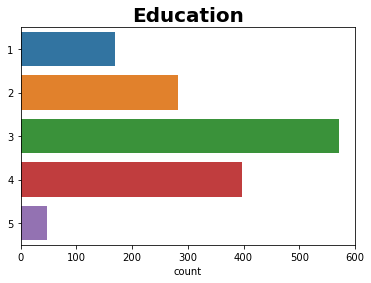

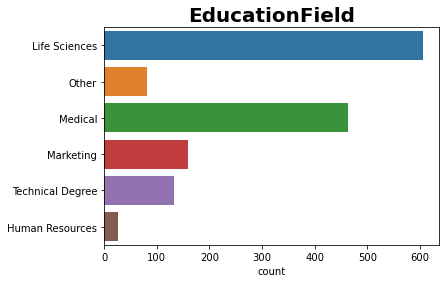

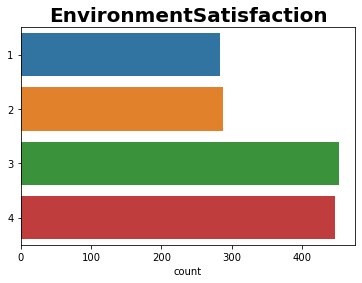

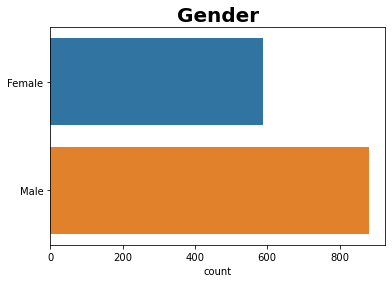

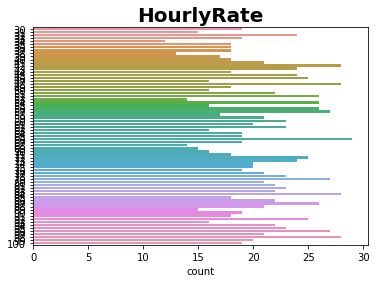

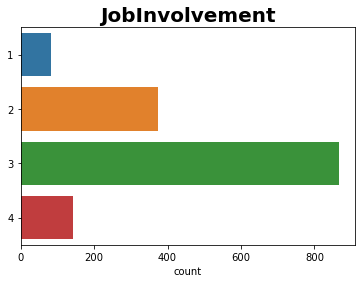

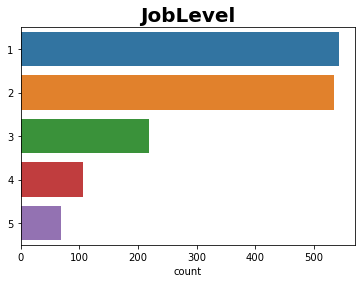

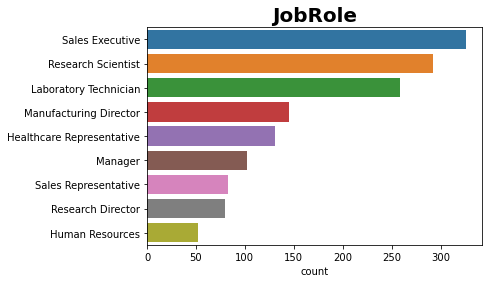

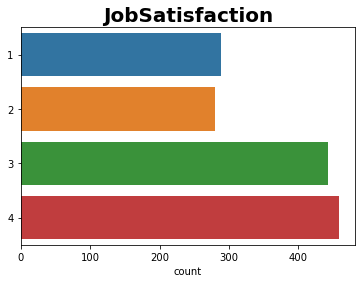

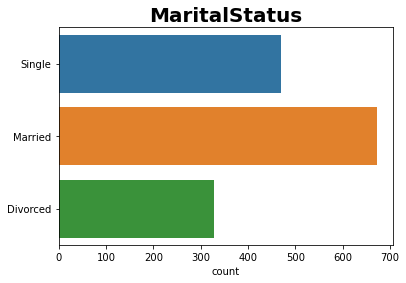

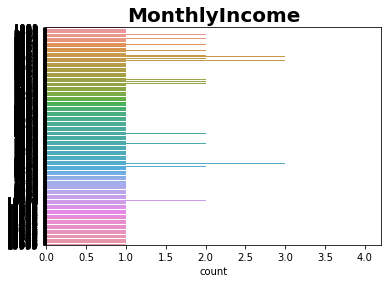

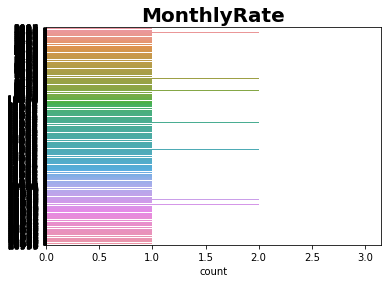

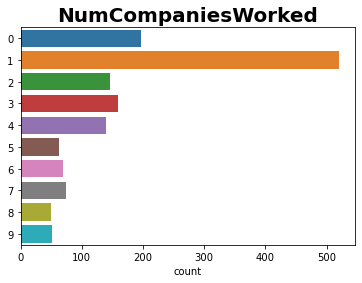

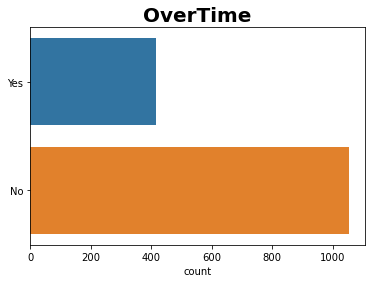

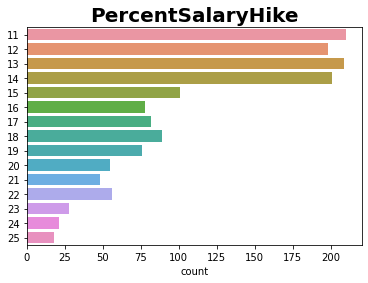

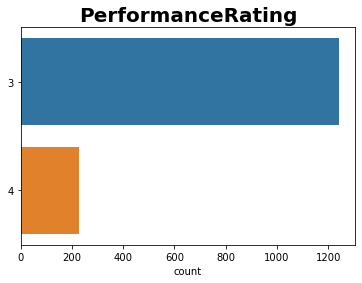

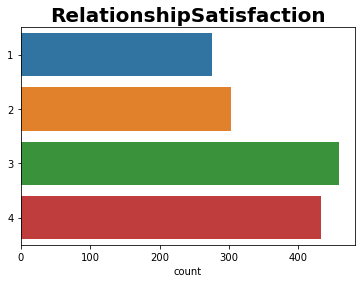

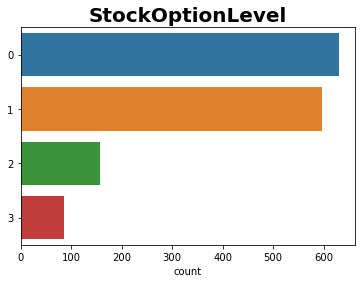

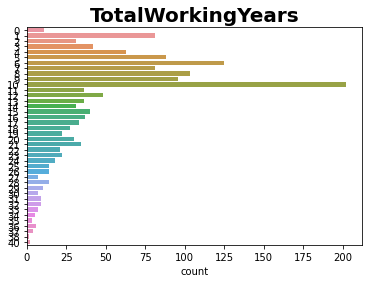

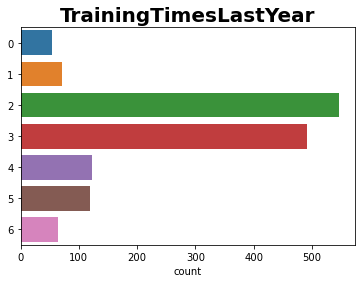

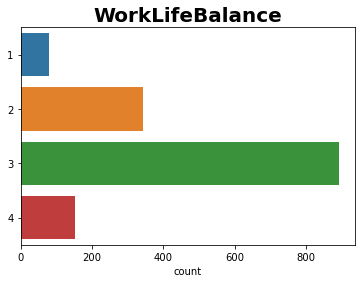

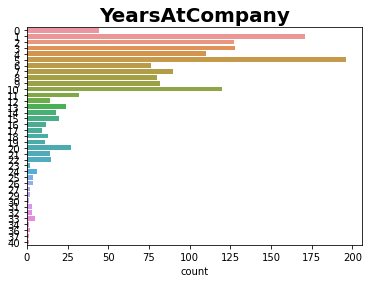

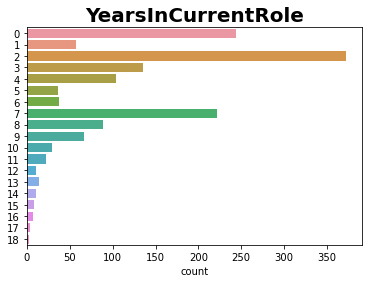

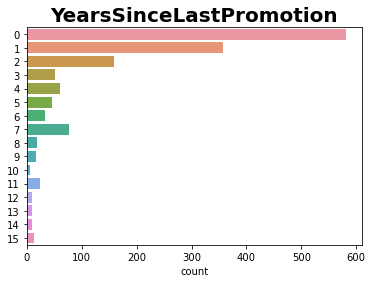

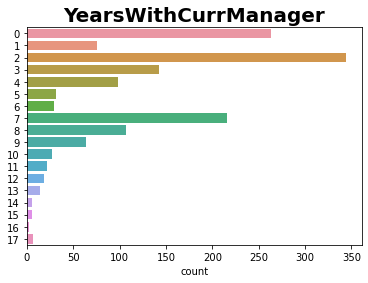

In [27]:
for i in df:
    a=sns.countplot(data=df,y=i,)
    a.set_title(i,fontsize=20,fontweight ='bold')
    a.set_ylabel("")
    plt.show()

In [39]:
# Changing categorical data to numerical
ohe=OneHotEncoder()
x=df[["BusinessTravel",  "Department",  "Gender",  "MaritalStatus",   "OverTime"]].values
x=ohe.fit_transform(x).toarray()
y=z=np.hstack(ohe.categories_)
merge= pd.DataFrame(data=x,columns=y)
df1=pd.concat([df,merge],axis=1)
pd.set_option('display.max_columns',None)
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Female,Male,Divorced,Married,Single,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [40]:
df1.drop(["BusinessTravel","Non-Travel",  "Department","Human Resources",  "Gender", "Female", "MaritalStatus","Divorced",   "OverTime","No"],axis=1,inplace=True)
df1.rename(columns = {'Yes':'Overtime'},inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1["EducationField"]=le.fit_transform(dfn["EducationField"])
df1["JobRole"]=le.fit_transform(dfn["JobRole"])

In [42]:
df1

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Married,Single,Overtime
0,41,Yes,1102,1,2,1,2,94,3,2,7,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,No,279,8,1,1,3,61,2,2,6,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,37,Yes,1373,2,2,4,4,92,2,1,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,33,No,1392,3,4,1,4,56,3,1,6,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,No,591,2,1,3,1,40,3,1,2,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,3,41,4,2,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1466,39,No,613,6,1,3,4,42,2,3,0,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1467,27,No,155,4,3,1,2,87,4,2,4,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1468,49,No,1023,2,3,3,4,63,2,2,7,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [43]:
z=np.abs(zscore(dfn.drop(["Attrition"],axis=1)))
df2=df1[(z<3).all(axis=1)]
df2

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Married,Single,Overtime
0,41,Yes,1102,1,2,1,2,94,3,2,7,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,No,279,8,1,1,3,61,2,2,6,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,37,Yes,1373,2,2,4,4,92,2,1,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,33,No,1392,3,4,1,4,56,3,1,6,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,No,591,2,1,3,1,40,3,1,2,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,3,41,4,2,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1466,39,No,613,6,1,3,4,42,2,3,0,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1467,27,No,155,4,3,1,2,87,4,2,4,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1468,49,No,1023,2,3,3,4,63,2,2,7,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


### Skewness


In [44]:
#Checking skewness
df2.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
Travel_Frequently           1.585303
Travel_Rarely              -0.912096
R

The data contains only 0 and 1 as values, it is most likely that the data is already binary in nature and there is no need to remove skewness.

### Checking outliers using boxplots.

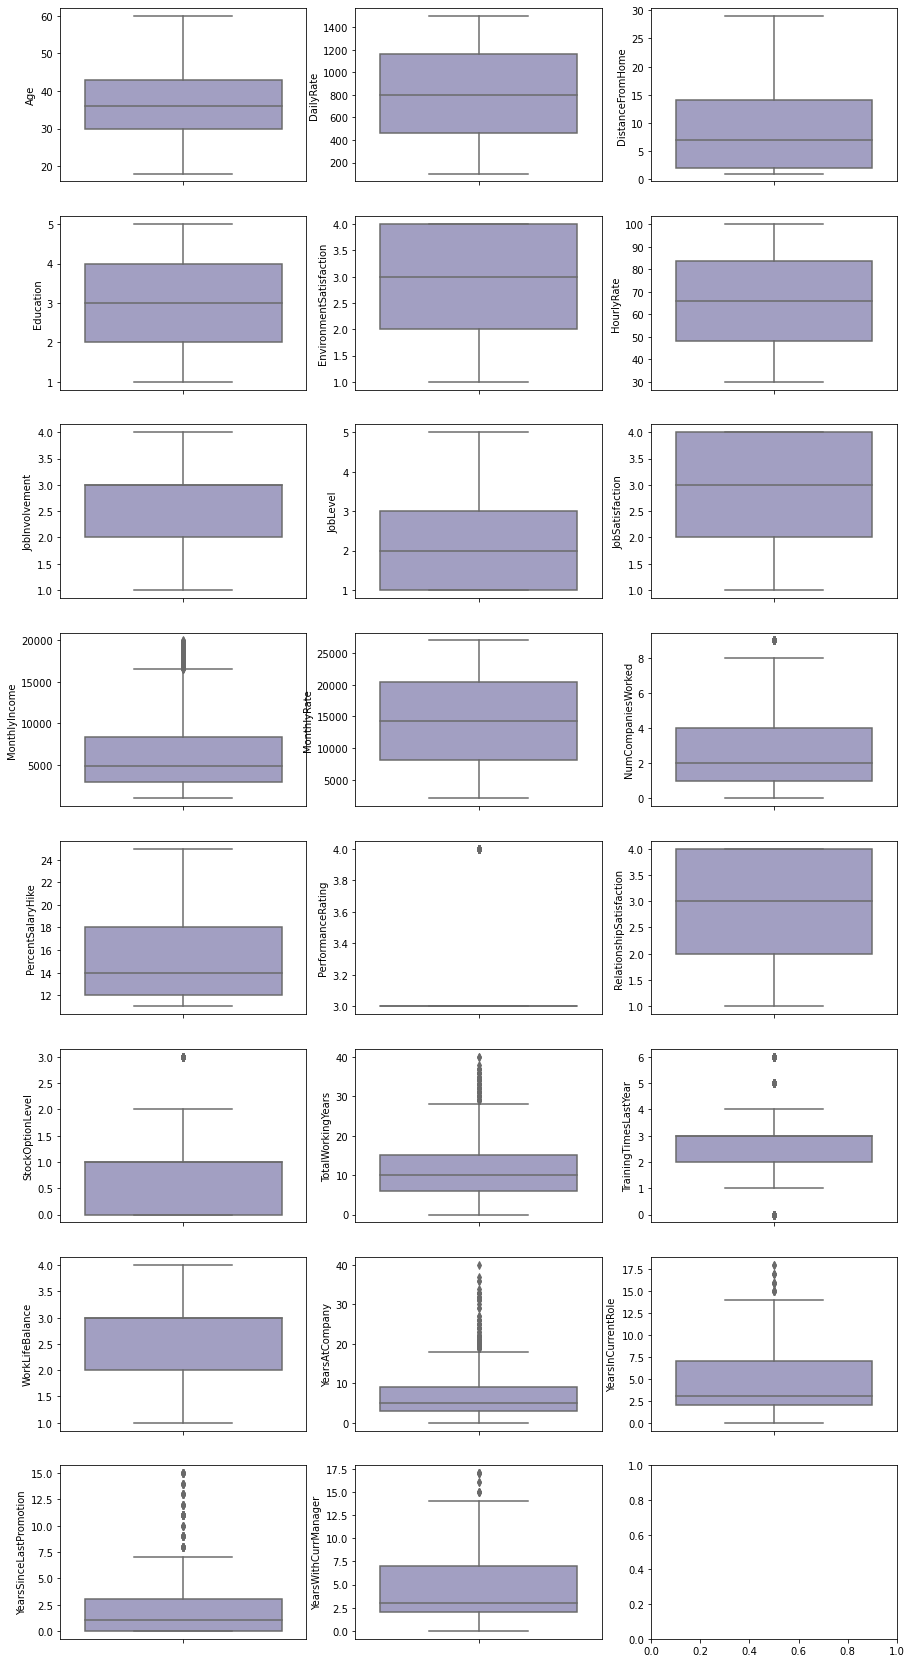

In [45]:
fig, ax=plt.subplots(ncols=3,nrows=8,figsize=(15,30))
index=0
ax=ax.flatten()
for col,value in df[Integer_datatype].items():
    sns.boxplot(y=col,data=df,ax=ax[index],palette='Purples')
    index +=1
    
plt.show()

Many data have outliers present in them so they need to be treated.

### Treating outliers with z score.

In [46]:
z=np.abs(zscore(df1.drop("Attrition",axis=1)))
df2=df1[(z<3).all(axis=1)]
df2

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Married,Single,Overtime
0,41,Yes,1102,1,2,1,2,94,3,2,7,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,No,279,8,1,1,3,61,2,2,6,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,37,Yes,1373,2,2,4,4,92,2,1,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,33,No,1392,3,4,1,4,56,3,1,6,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,No,591,2,1,3,1,40,3,1,2,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,3,41,4,2,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1466,39,No,613,6,1,3,4,42,2,3,0,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1467,27,No,155,4,3,1,2,87,4,2,4,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1468,49,No,1023,2,3,3,4,63,2,2,7,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [47]:
# data loss
data_loss=((df1.shape[0]-df2.shape[0])/df1.shape[0])*100
print(f'data loss is : {data_loss:0.1f}%')

data loss is : 5.6%


In [48]:
X=dffn.drop("Attrition", axis=1)
y=(dffn["Attrition"])
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [49]:
lg=LogisticRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lg.fit(x_train,y_train)
    lg_predict_train=lg.predict(x_train)
    lg_predict_test=lg.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{accuracy_score(y_train,lg_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{accuracy_score(y_test,lg_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.8957617411225659
At random state 0, The test accuracy is :-0.8654292343387471


At random state 1, The training accuracy is :-0.8865979381443299
At random state 1, The test accuracy is :-0.8677494199535963


At random state 2, The training accuracy is :-0.8854524627720504
At random state 2, The test accuracy is :-0.8816705336426914


At random state 3, The training accuracy is :-0.8923253150057274
At random state 3, The test accuracy is :-0.8723897911832946


At random state 4, The training accuracy is :-0.8785796105383734
At random state 4, The test accuracy is :-0.8932714617169374


At random state 5, The training accuracy is :-0.8865979381443299
At random state 5, The test accuracy is :-0.8863109048723898


At random state 6, The training accuracy is :-0.9003436426116839
At random state 6, The test accuracy is :-0.8607888631090487


At random state 7, The training accuracy is :-0.8934707903780069
At random state 7, The test accuracy is

At random state 74, The training accuracy is :-0.8923253150057274
At random state 74, The test accuracy is :-0.8700696055684455


At random state 75, The training accuracy is :-0.8946162657502864
At random state 75, The test accuracy is :-0.8747099767981439


At random state 76, The training accuracy is :-0.9014891179839634
At random state 76, The test accuracy is :-0.8700696055684455


At random state 77, The training accuracy is :-0.8785796105383734
At random state 77, The test accuracy is :-0.8863109048723898


At random state 78, The training accuracy is :-0.8991981672394044
At random state 78, The test accuracy is :-0.8723897911832946


At random state 79, The training accuracy is :-0.8843069873997709
At random state 79, The test accuracy is :-0.8561484918793504


At random state 80, The training accuracy is :-0.8946162657502864
At random state 80, The test accuracy is :-0.8677494199535963


At random state 81, The training accuracy is :-0.8888888888888888
At random state 81, The 

5 is the best random state

### Model building.

In [52]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=63)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(978, 33) (978,)
(326, 33) (326,)


In [55]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()

In [57]:
def classification(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=989)
    
    #Model training
    model.fit(X_train,y_train)

    #y_test prediction
    pred=model.predict(X_test)
    
    #Accuracy score
    acc_score=(accuracy_score(y_test,pred))*100
    print("Accuracy score: ",acc_score)
    
    #Classification report
    class_report = classification_report(y_test,pred)
    print("\nClassification report: \n",class_report)
    
    #Cross validation score
    cv_score=(cross_val_score(model,X,y,cv=5).mean())*100
    print("Cross validation score: ",cv_score)
    
    #Accuracy score-cross validation score
    result = acc_score-cv_score
    print("\nAccuracy score- cross validation score is",result)

### Logistic regression

In [67]:
model=LogisticRegression()
classification(model,X,y)

model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classification(model,X,y)
print("==============================================\n\n\n====================================================")

model = DecisionTreeClassifier(random_state=25,max_depth=20)
classification(model,X,y)
print("==============================================\n\n\n====================================================")

model =  RandomForestClassifier(max_depth=12,random_state=99)
classification(model,X,y)
print("==============================================\n\n\n====================================================")

model=KNeighborsClassifier(n_neighbors=15)
classification(model,X,y)
print("==============================================\n\n\n====================================================")

model = ExtraTreesClassifier()
classification(model,X,y)
print("==============================================\n\n\n====================================================")


Accuracy score:  84.96932515337423

Classification report: 
               precision    recall  f1-score   support

          No       0.85      1.00      0.92       276
         Yes       1.00      0.02      0.04        50

    accuracy                           0.85       326
   macro avg       0.92      0.51      0.48       326
weighted avg       0.87      0.85      0.78       326

Cross validation score:  83.20542292956085

Accuracy score- cross validation score is 1.7639022238133748
Accuracy score:  84.66257668711657

Classification report: 
               precision    recall  f1-score   support

          No       0.85      1.00      0.92       276
         Yes       0.00      0.00      0.00        50

    accuracy                           0.85       326
   macro avg       0.42      0.50      0.46       326
weighted avg       0.72      0.85      0.78       326

Cross validation score:  82.89890951959917

Accuracy score- cross validation score is 1.7636671675173972


Accuracy sco

### Hyper parameter tuning

In [70]:
param={'criterion' :['gini','entropy'],
      'splitter':['best','random'],
      'min_samples_split':[2,3,4],
      'max_depth':[4,6,8],
      'random_state':[42,111,759]}

In [71]:
dict2={"penalty":['elasticnet','l1','l2'],"solver":['saga'],"max_iter":list(range(100)), "multi_class":['auto', 'ovr', 'multinomial'],"class_weight":['dict','balanced']}
gv=GridSearchCV(lg,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'class_weight': 'dict',
 'max_iter': 7,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'saga'}

In [72]:
lg_final=LogisticRegression(class_weight= 'dict',max_iter = 8, multi_class= 'auto', penalty='l1',solver= 'saga')
lg_final.fit(train_x,train_y)
prf=lg_final.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(lg_final,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.8742331288343558
Cross Validation Score is : [0.8877551  0.90306122 0.8622449  0.86153846 0.85641026]
Mean Score : 0.8742019884877028


### Saving the model

In [73]:
import joblib
joblib.dump(lg_final,"HR_attrition_rfc.obj")

['HR_attrition_rfc.obj']

In [74]:
lg_l=joblib.load('HR_attrition_rfc.obj')

In [75]:
result=lg_l.predict(test_x)

In [76]:
print(accuracy_score(test_y,result))

0.8742331288343558


In [77]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430
Predicted,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes
Original,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,N